# üé• Exploration 7 Main Project : ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôîÎ¶¨Î∑∞ Í∞êÏÑ±Î∂ÑÏÑù üé•

## ‚ú® ÌîÑÎ°úÏ†ùÌä∏ Î™©Ìëú ‚ú®
1. 3Í∞ÄÏßÄ Ïù¥ÏÉÅÏùò Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ Text Classification TaskÎ•º Íµ¨ÌòÑÌï† Ïàò ÏûàÎã§.
2. gensimÏùò Ïú†ÏÇ¨Îã®Ïñ¥ Ï∞æÍ∏∞Î•º ÌôúÏö©ÌïòÏó¨ ÏûêÏ≤¥ ÌòπÏùÄ ÏÇ¨Ï†Ñ ÌïôÏäµÎêú ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥Î•º Î∂ÑÏÑùÌï† Ïàò ÏûàÎã§.
3. ÌïúÍµ≠Ïñ¥ Word2VecÏùÑ ÌôúÏö©ÌïòÏó¨ Í∞êÏÑ±Î∂ÑÏÑùÏùò validation Ï†ïÌôïÎèÑ 85% Ïù¥ÏÉÅÏù¥ ÎêòÎèÑÎ°ù ÏÑ§Ï†ïÌï† Ïàò ÏûàÎã§.

## ‚ú® ÌîÑÎ°úÏ†ùÌä∏ Ï∞∏Í≥† Îç∞Ïù¥ÌÑ∞ ‚ú®
- Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Îäî ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôîÏóê Îã¨Î¶∞ ÎåìÍ∏ÄÎì§ÏùÑ Î™®ÏïÑ Íµ¨ÏÑ±Îêú **Naver sentiment movie corpus** Ïù¥Îã§.
- AIFFEL ÌÅ¥ÎùºÏö∞Îìú ÌôòÍ≤ΩÏóêÏÑúÎäî **Ïã¨Î≥ºÎ¶≠ ÎßÅÌÅ¨**Î•º Í±∏Ïñ¥Ï§åÏúºÎ°úÏÑú Î≥ÑÎèÑÏùò Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìúÎ•º ÏãúÎèÑÌïòÏßÄ ÏïäÍ≥† ÏßÑÌñâÌïúÎã§.

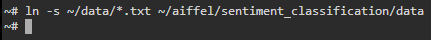

## ‚ú® Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ≥† ÌôïÏù∏ÌïòÍ∏∞ ‚ú®
- Í∞êÏÑ±Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º import ÌïúÎã§.
- Í∞êÏÑ±Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑ, ÌôïÏù∏ÌïúÎã§.

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import glob
import os
import re
import numpy as np
import pandas as pd

from collections import Counter

import urllib.request
from konlpy.tag import Okt, Mecab

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant

from gensim.models import KeyedVectors
import gensim
from sklearn.model_selection import train_test_split

from keras.layers import Bidirectional, LSTM, GRU, Dense, Conv1D
from keras.layers import Embedding, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

In [2]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
train_data.head(6)

id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1
5   5403919      Îßâ Í±∏ÏùåÎßà ÎóÄ 3ÏÑ∏Î∂ÄÌÑ∞ Ï¥àÎì±ÌïôÍµê 1ÌïôÎÖÑÏÉùÏù∏ 8ÏÇ¥Ïö©ÏòÅÌôî.„Öã„Öã„Öã...Î≥ÑÎ∞òÍ∞úÎèÑ ÏïÑÍπåÏõÄ.      0

In [3]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
test_data.head(6)

id                                           document  label
0  6270596                                                Íµ≥ „Öã      1
1  9274899                               GDNTOPCLASSINTHECLUB      0
2  8544678             Î≠êÏïº Ïù¥ ÌèâÏ†êÎì§ÏùÄ.... ÎÇòÏÅòÏßÑ ÏïäÏßÄÎßå 10Ï†ê ÏßúÎ¶¨Îäî ÎçîÎçîÏö± ÏïÑÎãàÏûñÏïÑ      0
3  6825595                   ÏßÄÎ£®ÌïòÏßÄÎäî ÏïäÏùÄÎç∞ ÏôÑÏ†Ñ ÎßâÏû•ÏûÑ... ÎèàÏ£ºÍ≥† Î≥¥Í∏∞ÏóêÎäî....      0
4  6723715  3DÎßå ÏïÑÎãàÏóàÏñ¥ÎèÑ Î≥Ñ Îã§ÏÑØ Í∞ú Ï§¨ÏùÑÌÖêÎç∞.. Ïôú 3DÎ°ú ÎÇòÏôÄÏÑú Ï†ú Ïã¨Í∏∞Î•º Î∂àÌé∏ÌïòÍ≤å ÌïòÏ£†??      0
5  7898805                                 ÏùåÏïÖÏù¥ Ï£ºÍ∞Ä Îêú, ÏµúÍ≥†Ïùò ÏùåÏïÖÏòÅÌôî      1

## ‚ú® Îç∞Ïù¥ÌÑ∞ Î°úÎçî Íµ¨ÏÑ±ÌïòÍ∏∞ ‚ú®
- ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú Îã§Î£®Îäî Naver sentiment movie corpus Îç∞Ïù¥ÌÑ∞Ïóê ÏÜçÌïú ÌÖçÏä§Ìä∏Îäî **Í∞ÄÍ≥µÎêòÏßÄ ÏïäÏùÄ ÏÉÅÌÉú**Ïù¥Îã§.
- Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎ•º Íµ¨ÏÑ±ÌïòÎäî Ï†àÏ∞®Îäî Exploration Ïó∞Ïäµ Í≥ºÏ†ïÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò **imdb.data_loader() Î©îÏÜåÎìúÏôÄ ÎèôÏùºÌïòÍ≤å ÎèôÏûë**ÌïòÎèÑÎ°ù ÏÑ§Ï†ïÌïòÎäî Ï†àÏ∞®Ïù¥Îã§. **data_loader ÏïàÏóêÏÑúÎäî Îã§ÏùåÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÎã§.**

1. Ï§ëÎ≥µÎêòÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
2. NaNÏúºÎ°ú ÎåÄÏùëÎêòÎäî Í≤∞Ï∏°Ïπò Ï†úÍ±∞
3. ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÌÜ†ÌÅ∞Ìôî
4. Stopwords Ï¶â, Î∂àÏö©Ïñ¥Î°ú Î∂àÎ¶¨Îäî Îã®Ïñ¥ Ï†úÍ±∞
5. ÏÇ¨Ï†Ñ word_to_index Íµ¨ÏÑ±
6. ÌÖçÏä§Ìä∏ Ïä§Ìä∏ÎßÅÏùÑ ÏÇ¨Ï†ÑÏùò index Ïä§Ìä∏ÎßÅÏúºÎ°ú Î≥ÄÌôò
7. ÏúÑÏùò Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ X_train, y_train, X_test, y_test, word_to_indexÎ•º Î¶¨ÌÑ¥

- Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî ÎÖ∏ÎìúÏóêÏÑú ÏÜåÍ∞úÎêú Îç∞Ïù¥ÌÑ∞ Î°úÎçî Íµ¨ÏÑ± Í¥ÄÎ†® ÏΩîÎìúÎ•º ÌôúÏö©ÌïúÎã§.

In [4]:
tokenizer = Mecab()
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # ÌÜ†ÌÅ∞Ìôî
        temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # ÌÜ†ÌÅ∞Ìôî
        temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥Î•º ÏÇ¥Ìé¥Î≥¥Í≥† word_to_indexÏùò Í∏∏Ïù¥ÏôÄ ÏûêÎ£åÌòïÏùÑ ÏÇ¥ÌïÄÎã§.

In [5]:
print(len(X_train)) 
print(len(y_train)) 
print('-'*12)
print(len(X_test))
print(len(y_test))
print('-'*36)
print('word_to_index : ',len(word_to_index), type(word_to_index))

146182
146182
------------
49157
49157
------------------------------------
word_to_index :  9997 <class 'dict'>


- word_to_indexÏóêÎäî Ïñ¥Îñ§ ÎÇ¥Ïö©Ïù¥ Îì§Ïñ¥ÏûàÎäîÏßÄ ÌôïÏù∏ÌïúÎã§.
- word_to_indexÎäî **word:index** ÌòïÌÉúÎ°ú Î¨∂Ïù∏ Îç∞Ïù¥ÌÑ∞Îì§Ïùò ÏßëÌï©Ïù¥Îã§.
- ÌååÏù¥Ïç¨ ÌîÑÎ°úÍ∑∏ÎûòÎ∞çÏùò indexÎäî 0Î∂ÄÌÑ∞ ÏãúÏûëÏù¥Îã§.
- ÌôïÏù∏Ìï¥ Î≥¥Î©¥, ÏïûÏ™ΩÏóê ÏûàÏñ¥Ïïº Ìï† **PAD, BOS, UNKÍ∞Ä ÎÇòÌÉÄÎÇòÏßÄ ÏïäÏïòÏùå**ÏùÑ Ïïå Ïàò ÏûàÎã§. Ïù¥Îì§ÏùÑ Í∞ÅÍ∞Å **index 0, 1, 2Î°ú ÎåÄÏùë**ÏãúÏºú ÎîïÏÖîÎÑàÎ¶¨Ïóê Ìè¨Ìï®ÏãúÌÇ®Îã§.

In [6]:
word_to_index

{'': 3,
 '.': 4,
 'ÏòÅÌôî': 5,
 'Îã§': 6,
 'Í≥†': 7,
 'Ìïò': 8,
 'ÏùÑ': 9,
 'Î≥¥': 10,
 '..': 11,
 'Í≤å': 12,
 ',': 13,
 '!': 14,
 'ÏßÄ': 15,
 'Ïûà': 16,
 'ÏóÜ': 17,
 '?': 18,
 'Ï¢ã': 19,
 'ÎÇò': 20,
 'Ïóà': 21,
 'Îßå': 22,
 'ÎäîÎç∞': 23,
 'ÎÑàÎ¨¥': 24,
 'Î¥§': 25,
 'Ï†Å': 26,
 'Ïïà': 27,
 'Ï†ïÎßê': 28,
 'Î°ú': 29,
 'Ïùå': 30,
 'Í≤É': 31,
 'ÏïÑ': 32,
 'ÎÑ§Ïöî': 33,
 'Ïû¨Î∞å': 34,
 'Ïñ¥': 35,
 'Í∞ô': 36,
 'Ï†ê': 37,
 'ÏßÄÎßå': 38,
 'ÏßÑÏßú': 39,
 'Ìñà': 40,
 'ÏóêÏÑú': 41,
 'Í∏∞': 42,
 'ÎÑ§': 43,
 'Ïïä': 44,
 'Í±∞': 45,
 'Ïïò': 46,
 'Ïàò': 47,
 'Îêò': 48,
 'Î©¥': 49,
 '„Öã„Öã': 50,
 'Îßê': 51,
 'Ïó∞Í∏∞': 52,
 'Ïù∏': 53,
 'Ï£º': 54,
 'ÎÇ¥': 55,
 'ÏµúÍ≥†': 56,
 '~': 57,
 'ÌèâÏ†ê': 58,
 'Ïù¥Îü∞': 59,
 'Îçò': 60,
 'Ïñ¥Ïöî': 61,
 'Ìï†': 62,
 'Ïôú': 63,
 'Í≤†': 64,
 '1': 65,
 'Ïä§ÌÜ†Î¶¨': 66,
 'Ìï¥': 67,
 'ÏäµÎãàÎã§': 68,
 '„Öã„Öã„Öã': 69,
 '...': 70,
 'ÎìúÎùºÎßà': 71,
 'ÏÉùÍ∞Å': 72,
 'ÏïÑÎãà': 73,
 'Îçî': 74,
 'Í∑∏': 75,
 'Ïã∂': 76,
 'ÏÇ¨Îûå': 77,
 'ÎìØ': 78,
 'Îïå': 79,
 'Í∞êÎèô': 80,
 'Ìï®'

In [7]:
word_to_index["<PAD>"] = 0  # Ìå®Îî©
word_to_index["<BOS>"] = 1  # Î™®Îì† Î¨∏Ïû•Ïùò ÏãúÏûë
word_to_index["<UNK>"] = 2  # UnknownÏùÑ ÏùòÎØ∏

- **Ïù∏Îç±Ïä§:Îã®Ïñ¥**(ÌÇ§:Í∞í) ÌòïÌÉúÏùò ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±

In [8]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [9]:
# Î¨∏Ïû• 1Í∞úÎ•º ÌôúÏö©Ìï† ÎîïÏÖîÎÑàÎ¶¨ÏôÄ Ìï®Íªò Ï£ºÎ©¥ Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌï¥ Ï£ºÎäî Ìï®Ïàò 
# Î™®Îì† Î¨∏Ïû•ÏùÄ <BOS>Î°ú ÏãúÏûëÌïòÎèÑÎ°ù ÏÑ§Ï†ï
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# Ïó¨Îü¨ Í∞úÏùò Î¨∏Ïû• Î¶¨Ïä§Ìä∏Î•º ÌïúÍ∫ºÎ≤àÏóê Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú encodeÌï¥ Ï£ºÎäî Ìï®Ïàò
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÏõêÎûòÎåÄÎ°ú decodeÌïòÎäî Ìï®Ïàò
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]Î•º ÌÜµÌï¥ <BOS>Î•º Ï†úÏô∏

# Ïó¨Îü¨ Í∞úÏùò Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÌïúÍ∫ºÎ≤àÏóê ÏõêÎûòÎåÄÎ°ú decodeÌï¥ Ï£ºÎäî Ìï®Ïàò
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

## ‚ú® Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è Í∞ÄÍ≥µ ‚ú®
- Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥Ïùò Î¨∏Ïû•Ïùò Í∏∏Ïù¥ Î∂ÑÌè¨ ÌôïÏù∏
- ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥Î•º Ï†ÅÏ†àÌïòÍ≤å ÏßÄÏ†ï
- keras.preprocessing.sequence.pad_sequencesÎ•º ÌôúÏö©Ìïú Ìå®Îî©

In [10]:
total_data_text = list(X_train) + list(X_test)
# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î¨∏Ïû• Í∏∏Ïù¥Ïùò Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# Î¨∏Ïû• Í∏∏Ïù¥Ïùò ÌèâÍ∑†Í∞í, ÏµúÎåÄÍ∞í, ÌëúÏ§ÄÌé∏Ï∞® Í∞ÅÍ∞Å Í≥ÑÏÇ∞
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† : ', np.mean(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ : ', np.max(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® : ', np.std(num_tokens))

# ÏòàÎ•ºÎì§Ïñ¥, ÏµúÎåÄ Í∏∏Ïù¥Î•º (ÌèâÍ∑† + 2*ÌëúÏ§ÄÌé∏Ï∞®)Î°ú ÌïúÎã§Î©¥,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò {}% Ï†ïÎèÑÍ∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎÑ§Ïöî! '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† :  15.96940191154864
Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ :  116
Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® :  12.843571191092
pad_sequences maxlen :  41
Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò 0.9342988343341575% Ï†ïÎèÑÍ∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎÑ§Ïöî! 


In [11]:
# paddingÏùÑ ÌÜµÌï¥ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Î•º ÎßûÏ∂òÎã§.

x_train = pad_sequences(X_train,
                        value=word_to_index["<PAD>"],
                        padding='post', # ÌòπÏùÄ 'pre'
                        maxlen=maxlen)

x_test = pad_sequences(X_test,
                       value=word_to_index["<PAD>"],
                       padding='post', # ÌòπÏùÄ 'pre'
                       maxlen=maxlen)

print(x_train.shape)
print(x_test.shape)

(146182, 41)
(49157, 41)


In [12]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏïûÏ™Ω 10000Í∞ú ÍπåÏßÄ validation setÏúºÎ°ú ÏÇ¨Ïö©
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation setÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄÎäî Î™®Îëê ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(136182, 41)
(136182,)


## ‚ú® Î™®Îç∏ Î∞è validation set ÌôúÏö© ‚ú®

- Ïö∞ÏÑ†, **Îã®Ïñ¥ ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞**Î•º ÏßÄÏ†ïÌï¥Ï£ºÍ≥† **Ìïú Îã®Ïñ¥Î•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏùò Í∞úÏàò**Î•º ÏÑ§Ï†ïÌï¥Ï§ÄÎã§.

In [13]:
vocab_size = 10000  # Îã®Ïñ¥ ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞Î•º ÏßÄÏ†ï
word_vector_dim = 4   # Ìïú Îã®Ïñ¥Î•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏùò Í∞úÏàò

- Ïù¥Ï†ú Í∞Å Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÍ≥† ÌïôÏäµÏãúÌÇ® Îã§Ïùå ÌèâÍ∞ÄÎ•º Ïã§ÏãúÌïúÎã§.
- ÌèâÍ∞Ä ÌõÑÏóêÎäî Í∞Å Î™®Îç∏Ïùò Accuracy, Loss Í∑∏ÎûòÌîÑÎ•º ÏãúÍ∞ÅÌôîÌïòÏó¨ ÎÇòÌÉÄÎÇ∏Îã§.

### A. 1-D CNN

In [14]:
# 1-D CNN Î™®Îç∏ Íµ¨ÏÑ±

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 3, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 4)           40000     
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          416       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1552      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9

In [15]:
# 1-D CNN Î™®Îç∏ ÌïôÏäµ

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
            
epochs=4

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=epochs,
                   batch_size=64,
                   validation_data=(x_val, y_val),
                   verbose=1)

Epoch 1/4
2128/2128 [==============================] - 18s 6ms/step - loss: 0.4821 - accuracy: 0.7468 - val_loss: 0.3434 - val_accuracy: 0.8490
Epoch 2/4
2128/2128 [==============================] - 10s 5ms/step - loss: 0.3210 - accuracy: 0.8640 - val_loss: 0.3340 - val_accuracy: 0.8551
Epoch 3/4
2128/2128 [==============================] - 10s 5ms/step - loss: 0.2909 - accuracy: 0.8796 - val_loss: 0.3395 - val_accuracy: 0.8517
Epoch 4/4
2128/2128 [==============================] - 10s 5ms/step - loss: 0.2685 - accuracy: 0.8898 - val_loss: 0.3454 - val_accuracy: 0.8537


In [16]:
# 1-D CNN Î™®Îç∏ ÌèâÍ∞Ä

results = model.evaluate(x_test, y_test, verbose=2)

print(results)

1537/1537 - 4s - loss: 0.3550 - accuracy: 0.8485
[0.3550155758857727, 0.8484651446342468]


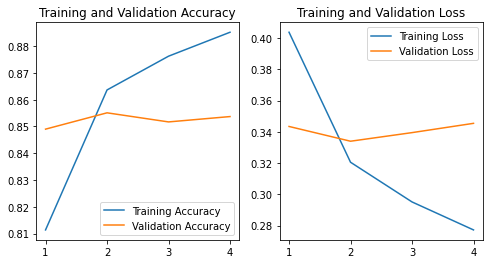

In [17]:
# Accuracy, Loss Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy Í∑∏ÎûòÌîÑ
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### B. GlobalMaxPooling1D Ìïú Í∞úÏùò Î†àÏù¥Ïñ¥Îßå ÏÇ¨Ïö©Ìïú Î™®Îç∏

In [18]:
# GlobalMaxPooling1D Î™®Îç∏ Íµ¨ÏÑ±

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 4)           40000     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 40,049
Trainable params: 40,049
Non-trainable params: 0
_________________________________________________________________


In [19]:
# GlobalMaxPooling1D Î™®Îç∏ ÌïôÏäµ

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
            
epochs=5

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=epochs,
                   batch_size=64,
                   validation_data=(x_val, y_val),
                   verbose=1)

Epoch 1/5
2128/2128 [==============================] - 8s 3ms/step - loss: 0.5615 - accuracy: 0.7175 - val_loss: 0.3912 - val_accuracy: 0.8219
Epoch 2/5
2128/2128 [==============================] - 7s 3ms/step - loss: 0.3766 - accuracy: 0.8335 - val_loss: 0.3787 - val_accuracy: 0.8305
Epoch 3/5
2128/2128 [==============================] - 7s 3ms/step - loss: 0.3508 - accuracy: 0.8495 - val_loss: 0.3785 - val_accuracy: 0.8330
Epoch 4/5
2128/2128 [==============================] - 7s 3ms/step - loss: 0.3368 - accuracy: 0.8553 - val_loss: 0.3790 - val_accuracy: 0.8325
Epoch 5/5
2128/2128 [==============================] - 7s 3ms/step - loss: 0.3290 - accuracy: 0.8588 - val_loss: 0.3811 - val_accuracy: 0.8305


In [20]:
# GlobalMaxPooling1D Î™®Îç∏ ÌèâÍ∞Ä

results = model.evaluate(x_test, y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.3967 - accuracy: 0.8235
[0.39671212434768677, 0.8235246539115906]


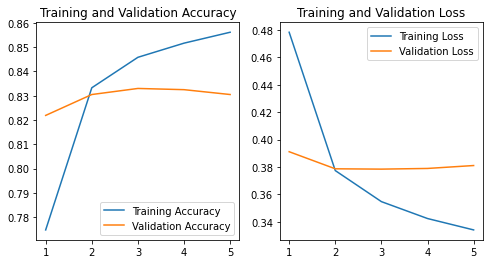

In [21]:
# Accuracy, Loss Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy Í∑∏ÎûòÌîÑ
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### C. LSTM Î†àÏù¥Ïñ¥

In [22]:
# LSTM Î†àÏù¥Ïñ¥ Î™®Îç∏ Íµ¨ÏÑ±
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))  #LSTM state Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  #ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 40,497
Trainable params: 40,497
Non-trainable params: 0
_________________________________________________________________


In [23]:
# LSTM Î†àÏù¥Ïñ¥ Î™®Îç∏ ÌïôÏäµ

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
            
epochs=5

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=epochs,
                   batch_size=64,
                   validation_data=(x_val, y_val),
                   verbose=1)

Epoch 1/5
2128/2128 [==============================] - 22s 9ms/step - loss: 0.5488 - accuracy: 0.6823 - val_loss: 0.3482 - val_accuracy: 0.8483
Epoch 2/5
2128/2128 [==============================] - 19s 9ms/step - loss: 0.3327 - accuracy: 0.8570 - val_loss: 0.3378 - val_accuracy: 0.8519
Epoch 3/5
2128/2128 [==============================] - 19s 9ms/step - loss: 0.3115 - accuracy: 0.8680 - val_loss: 0.3451 - val_accuracy: 0.8530
Epoch 4/5
2128/2128 [==============================] - 20s 9ms/step - loss: 0.3013 - accuracy: 0.8720 - val_loss: 0.3414 - val_accuracy: 0.8530
Epoch 5/5
2128/2128 [==============================] - 19s 9ms/step - loss: 0.2870 - accuracy: 0.8780 - val_loss: 0.3381 - val_accuracy: 0.8516


In [24]:
# LSTM Î™®Îç∏ ÌèâÍ∞Ä

results = model.evaluate(x_test, y_test, verbose=2)

print(results)

1537/1537 - 5s - loss: 0.3488 - accuracy: 0.8447
[0.34879791736602783, 0.8447220325469971]


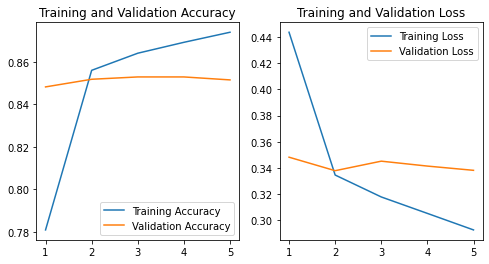

In [25]:
# Accuracy, Loss Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy Í∑∏ÎûòÌîÑ
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## ‚ú® ÌïôÏäµÎêú Embedding Layer Î∂ÑÏÑù ‚ú®

- Ïö∞ÏÑ†, ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º import Ìïú Îí§ ÏûëÏóÖÏùÑ ÏàòÌñâÌïúÎã§.

In [26]:
import os
import gensim
from gensim.models.keyedvectors import Word2VecKeyedVectors
from tensorflow.keras.initializers import Constant

# ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥ Ï∞®Ïõê ÌôïÏù∏
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # Ï∂úÎ†• ÌòïÌÉú : (vocab_size, embedding_dim)

(10000, 4)


In [27]:
import os

# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ Í∏∞Î°ù

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ù
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [28]:
from gensim.models.keyedvectors import Word2VecKeyedVectors
# ÌååÏùºÏóê Í∏∞Î°ùÎêú ÏûÑÎ≤†Îî© ÌååÎùºÎØ∏ÌÑ∞Î•º ÏùΩÏñ¥ÏÑú word vectorÎ°ú ÌôúÏö©
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)

# Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ÏôÄ Í∑∏ Ïú†ÏÇ¨ÎèÑ ÌôïÏù∏
word_vectors.similar_by_word("ÏÇ¨Îûë")

[('Î∏åÍ∏à', 0.9996980428695679),
 ('Í∏¥Îßê', 0.9994784593582153),
 ('Ïø®', 0.9994405508041382),
 ('ÏãúÏõê', 0.9990736246109009),
 ('ÏóêÏÑ†', 0.9986582398414612),
 ('ÎãÆ', 0.9986392259597778),
 ('ÏúºÏã†', 0.9986221790313721),
 ('ÏÑ∏Ïö∞', 0.9983918070793152),
 ('ÎäîÎã§Îäî', 0.9980425834655762),
 ('ÎÜÄÎûÄ', 0.9979112148284912)]

- ÏúÑÏùò Í≤∞Í≥ºÎ°ú Î≥¥ÏïÑ, Í∏∞Ï°¥Ïùò ÏòÅÏñ¥Î°ú Îêú Word2VecÏúºÎ°úÎäî **ÏÇ¨ÎûëÏùÑ ÌÇ§ÏõåÎìúÎ°ú Ìïú ÎπÑÏä∑Ìïú ÏùòÎØ∏Î•º Í∞ñÎäî Îã®Ïñ¥Î•º Ï∞æÍ∏∞ Ïñ¥Î†µÎã§.**
- Exploration ÎÖ∏ÎìúÏóêÏÑúÎäî ÌïúÍµ≠Ïñ¥ Î≤ÑÏ†ÑÏùò Word2VecÎ•º ÌôúÏö©Ìï† Ïàò ÏûàÎèÑÎ°ù Ï§ÄÎπÑÎêòÏñ¥ ÏûàÎã§. Ïù¥Ï†ú, Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥ ÏÑ±Îä•ÏùÑ Ïò¨Î†§Î≥º Í≤ÉÏù¥Îã§.

## ‚ú® ÌïúÍµ≠Ïñ¥ Î≤ÑÏ†Ñ Word2Vec Embedding ÌôúÏö©ÌïòÍ∏∞ ‚ú®

- Î®ºÏ†Ä gensim Ìå®ÌÇ§ÏßÄÏùò Î≤ÑÏ†ÑÏùÑ ÌôïÏù∏ÌïòÏûê. (2021.08.17 ÎÇ¥Ïö© ÏàòÏ†ï)
- ÌîÑÎ°úÏ†ùÌä∏ ÏàòÌñâ Í≥ºÏ†ïÏóêÏÑú gensim Ìå®ÌÇ§ÏßÄÏùò Î≤ÑÏ†ÑÏùÑ Îã§Ïö¥Í∑∏Î†àÏù¥ÎìúÌïòÏòÄÎã§. Ïù¥Ïú†Îäî ÌïúÍµ≠Ïñ¥ Word2Vec ÌååÏùºÏùÑ Ïûò Î∂àÎü¨Ïò§ÏßÄ Î™ªÌïòÎäî Î¨∏Ï†ú ÎïåÎ¨∏Ïù¥ÏóàÎã§.
- pip install --upgrade gensim==3.8.3 Î™ÖÎ†πÏñ¥Î•º Cloud ShellÏóê ÏûÖÎ†•Ìï¥ Ï£ºÏñ¥ ÌïúÍµ≠Ïñ¥ ÌååÏùºÏù∏ ko_modelÏùÑ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Î∂àÎü¨Ïò¨ Ïàò ÏûàÏóàÎã§.
- Word2VecÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞úÏÑ†ÌïòÍ∏∞ ÏúÑÌïú Í∏∞Ï¥à Îã®Í≥ÑÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥Î≥¥Ïûê.

In [29]:
# gensim Ìå®ÌÇ§ÏßÄ Î≤ÑÏ†Ñ ÏïåÏïÑÎ≥¥Í∏∞

import gensim
gensim.__version__

'3.8.3'

In [30]:
# ÌïúÍµ≠Ïñ¥ Word2Vec ÌååÏùº Î∂àÎü¨ÏôÄ ko_modelÏóê Ï†ÄÏû•ÌïòÍ∏∞

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'
ko_model = gensim.models.Word2Vec.load(word2vec_path)

In [32]:
from gensim.models import KeyedVectors

# Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ÏôÄ Í∑∏ Ïú†ÏÇ¨ÎèÑ ÌôïÏù∏
ko_model.wv.most_similar("ÏÇ¨Îûë")

[('Ïä¨Ìîî', 0.7216662764549255),
 ('ÌñâÎ≥µ', 0.6759077310562134),
 ('Ï†àÎßù', 0.6468985080718994),
 ('Í∏∞ÏÅ®', 0.6458414196968079),
 ('Ïù¥Î≥Ñ', 0.6334798336029053),
 ('Ï∂îÏñµ', 0.6320937275886536),
 ('Ïù∏ÏÉù', 0.6216273307800293),
 ('Ïï†Ï†ï', 0.6206069588661194),
 ('Ïó∞Ïù∏', 0.6186063289642334),
 ('Ïú†Ìòπ', 0.5965287685394287)]

In [33]:
ko_model['ÏÇ¨Îûë'].shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(200,)

- **(2021.08. 17 ÏàòÏ†ï) AIFFEL Ìè¨ÎüºÏùÑ ÌÜµÌï¥ ÏùºÎ∂Ä ÎÇ¥Ïö© ÏàòÏ†ï** üîß
1. ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê ÏàòÎäî ÏÇ¨Ï†ÑÏóê ÌïôÏäµÎêú ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥Ïóê Í∏∞Î∞òÌïòÎØÄÎ°ú ÏÇ¨ÎûåÏù¥ ÏßÅÏ†ë ÏÑ§Ï†ïÌïòÎäî ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ÏôÄÎäî Í±∞Î¶¨Í∞Ä ÏûàÏùå
2. Îî∞ÎùºÏÑú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î°ú Ïñ∏Í∏âÌïú Î∂ÄÎ∂ÑÏùÑ ÏÇ≠Ï†úÌïòÍ≥† ÎÇ¥Ïö©ÏùÑ ÏàòÏ†ïÌï®

In [35]:
vocab_size = 10000     # Îã®Ïñ¥ ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 200  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê Ïàò

embedding_matrix = np.random.rand(vocab_size, word_vector_dim) # ÏÇ¨Ï†ÑÌïôÏäµÎêú ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥Ïùò Ï∞®Ïõê Ïàò Í∑∏ÎåÄÎ°ú Îî∞ÎùºÍ∞ÄÎäî Í≤ÉÏù¥ Ï¢ãÏïÑÏöî!

#embedding_matrixÏóê Word2Vec ÏõåÎìúÎ≤°ÌÑ∞Î•º Îã®Ïñ¥ ÌïòÎÇòÏî© ÏàúÏÑúÎåÄÎ°ú Ïπ¥Ìîº
for i in range(4,vocab_size):
    if index_to_word[i] in ko_model:
        embedding_matrix[i] = ko_model[index_to_word[i]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


- Ïù¥Ï†ú ÌïúÍµ≠Ïñ¥ Word2VecÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Ïù¥Ï†ÑÏùò ÏÑ∏ Í∞ÄÏßÄ Î™®Îç∏ÏùÑ Îã§Ïãú ÌïôÏäµÏãúÌÇ§Í≥† ÌèâÍ∞ÄÌïúÎã§.

### A. LSTM Î†àÏù¥Ïñ¥

In [47]:
model_lstm = keras.Sequential()

model_lstm.add(keras.layers.Embedding(vocab_size, word_vector_dim, embeddings_initializer=Constant(embedding_matrix), 
                                  input_length=maxlen, trainable=True)) # trainableÏùÑ TrueÎ°ú Ï£ºÎ©¥ Fine-tuning
model_lstm.add(keras.layers.LSTM(8))          
model_lstm.add(keras.layers.Dense(4, activation='relu'))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))
         
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 6688      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 2,006,729
Trainable params: 2,006,729
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_lstm.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs_lstm=5
history_lstm = model_lstm.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs_lstm,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/5
1064/1064 [==============================] - 21s 18ms/step - loss: 0.6563 - accuracy: 0.5821 - val_loss: 0.4490 - val_accuracy: 0.8298
Epoch 2/5
1064/1064 [==============================] - 19s 18ms/step - loss: 0.4149 - accuracy: 0.8433 - val_loss: 0.3740 - val_accuracy: 0.8500
Epoch 3/5
1064/1064 [==============================] - 19s 18ms/step - loss: 0.3378 - accuracy: 0.8706 - val_loss: 0.3517 - val_accuracy: 0.8560
Epoch 4/5
1064/1064 [==============================] - 18s 17ms/step - loss: 0.3001 - accuracy: 0.8838 - val_loss: 0.3524 - val_accuracy: 0.8558
Epoch 5/5
1064/1064 [==============================] - 19s 18ms/step - loss: 0.2748 - accuracy: 0.8958 - val_loss: 0.3431 - val_accuracy: 0.8576


In [49]:
results = model_lstm.evaluate(x_test, y_test, verbose=2)

print(results)

1537/1537 - 6s - loss: 0.3526 - accuracy: 0.8523
[0.35260555148124695, 0.8523099422454834]


### B. 1-D CNN

In [50]:
model_cnn = keras.Sequential()

model_cnn.add(keras.layers.Embedding(vocab_size, word_vector_dim, embeddings_initializer=Constant(embedding_matrix),
                                 input_length=maxlen, trainable=True))
model_cnn.add(keras.layers.Conv1D(32, 3, activation='relu'))
model_cnn.add(keras.layers.MaxPooling1D(5))
model_cnn.add(keras.layers.Conv1D(16, 3, activation='relu'))
model_cnn.add(keras.layers.GlobalMaxPooling1D())
model_cnn.add(keras.layers.Dense(8, activation='relu'))
model_cnn.add(keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim ÏûÖÎãàÎã§.

model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 39, 32)            19232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 16)             1552      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [51]:
model_cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs_cnn=5
history_cnn = model_cnn.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs_cnn,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/5
1064/1064 [==============================] - 21s 17ms/step - loss: 0.5662 - accuracy: 0.6950 - val_loss: 0.3804 - val_accuracy: 0.8316
Epoch 2/5
1064/1064 [==============================] - 16s 15ms/step - loss: 0.3463 - accuracy: 0.8485 - val_loss: 0.3388 - val_accuracy: 0.8510
Epoch 3/5
1064/1064 [==============================] - 16s 15ms/step - loss: 0.2968 - accuracy: 0.8758 - val_loss: 0.3392 - val_accuracy: 0.8511
Epoch 4/5
1064/1064 [==============================] - 17s 16ms/step - loss: 0.2665 - accuracy: 0.8911 - val_loss: 0.3448 - val_accuracy: 0.8493
Epoch 5/5
1064/1064 [==============================] - 14s 13ms/step - loss: 0.2387 - accuracy: 0.9037 - val_loss: 0.3499 - val_accuracy: 0.8537


In [52]:
results2 = model_cnn.evaluate(x_test, y_test, verbose=2)

print(results2)

1537/1537 - 3s - loss: 0.3629 - accuracy: 0.8519
[0.3629055917263031, 0.851862370967865]


### C. GlobalMaxPooling1D Ìïú Í∞úÏùò Î†àÏù¥Ïñ¥Îßå ÏÇ¨Ïö©Ìïú Î™®Îç∏

In [71]:
model_gmp = keras.Sequential()

model_gmp.add(keras.layers.Embedding(vocab_size, word_vector_dim, embeddings_initializer=Constant(embedding_matrix),
                                 input_length=maxlen, trainable=True))
model_gmp.add(keras.layers.GlobalMaxPooling1D())
model_gmp.add(keras.layers.Dense(8, activation='relu'))
model_gmp.add(keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim

model_gmp.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 41, 200)           2000000   
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 200)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 1608      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 2,001,617
Trainable params: 2,001,617
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_gmp.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs_gmp=10
history_gmp = model_gmp.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs_gmp,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
2128/2128 [==============================] - 19s 9ms/step - loss: 0.4993 - accuracy: 0.7569 - val_loss: 0.4342 - val_accuracy: 0.7963
Epoch 2/10
2128/2128 [==============================] - 19s 9ms/step - loss: 0.4078 - accuracy: 0.8149 - val_loss: 0.3994 - val_accuracy: 0.8168
Epoch 3/10
2128/2128 [==============================] - 23s 11ms/step - loss: 0.3686 - accuracy: 0.8375 - val_loss: 0.3844 - val_accuracy: 0.8250
Epoch 4/10
2128/2128 [==============================] - 23s 11ms/step - loss: 0.3388 - accuracy: 0.8528 - val_loss: 0.3770 - val_accuracy: 0.8314
Epoch 5/10
2128/2128 [==============================] - 23s 11ms/step - loss: 0.3089 - accuracy: 0.8693 - val_loss: 0.4098 - val_accuracy: 0.8218
Epoch 6/10
2128/2128 [==============================] - 22s 10ms/step - loss: 0.2898 - accuracy: 0.8782 - val_loss: 0.3829 - val_accuracy: 0.8323
Epoch 7/10
2128/2128 [==============================] - 23s 11ms/step - loss: 0.2657 - accuracy: 0.8903 - val_loss: 0.3820 - v

In [74]:
results3 = model_gmp.evaluate(x_test, y_test, verbose=2)

print(results3)

1537/1537 - 3s - loss: 0.4286 - accuracy: 0.8292
[0.42858853936195374, 0.8292409777641296]


## üîî ÌîÑÎ°úÏ†ùÌä∏ ÏàòÌñâ Í≤∞Í≥º üîî

### ÌïôÏäµ Î∞è ÌèâÍ∞Ä, ÏãúÍ∞ÅÌôîÏóê ÏÇ¨Ïö©Ìïú 3Í∞ú Î™®Îç∏Ïóê ÎåÄÌïú ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© Ïú†Î¨¥Ïóê Îî∞Î•∏ AccuracyÎäî Îã§ÏùåÍ≥º Í∞ôÎã§.
1. **1-D CNN** : ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© Ï†Ñ 84.85% / ÏûÑÎ≤†Îî© ÌõÑ 85.19%
2. **LSTM Î†àÏù¥Ïñ¥** : ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© Ï†Ñ 84.47% / ÏûÑÎ≤†Îî© ÌõÑ 85.23%
3. **GlobalMaxPooling1D** : ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© Ï†Ñ 82.35% / ÏûÑÎ≤†Îî© ÌõÑ 82.92%

## üö© ÌîÑÎ°úÏ†ùÌä∏ Î£®Î∏åÎ¶≠ ÏûêÍ∞ÄÌèâÍ∞Ä üö©

### ÏïÑÎûò ÌîÑÎ°úÏ†ùÌä∏ Î™©ÌëúÏóê ÎåÄÌïòÏó¨ ÏûêÍ∞ÄÌèâÍ∞ÄÌïúÎã§. (Î£®Î∏åÎ¶≠ Ïó∞Í≥Ñ)

1. 3Í∞ÄÏßÄ Ïù¥ÏÉÅÏùò Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ Text Classification TaskÎ•º Íµ¨ÌòÑÌï† Ïàò ÏûàÎã§.
2. gensimÏùò Ïú†ÏÇ¨Îã®Ïñ¥ Ï∞æÍ∏∞Î•º ÌôúÏö©ÌïòÏó¨ ÏûêÏ≤¥ ÌòπÏùÄ ÏÇ¨Ï†Ñ ÌïôÏäµÎêú ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥Î•º Î∂ÑÏÑùÌï† Ïàò ÏûàÎã§.
3. ÌïúÍµ≠Ïñ¥ Word2VecÏùÑ ÌôúÏö©ÌïòÏó¨ Í∞êÏÑ±Î∂ÑÏÑùÏùò validation Ï†ïÌôïÎèÑ 85% Ïù¥ÏÉÅÏù¥ ÎêòÎèÑÎ°ù ÏÑ§Ï†ïÌï† Ïàò ÏûàÎã§.

### ÏûêÍ∞ÄÌèâÍ∞Ä Í≤∞Í≥º
1. ÌîÑÎ°úÏ†ùÌä∏ ÏàòÌñâ Í≤∞Í≥ºÏóêÏÑú 3Í∞ÄÏßÄ Î™®Îç∏Ïù¥ Î™ÖÏãúÎêòÏñ¥ ÏûàÍ≥†, ÏûÑÎ≤†Îî© Ï†ÑÌõÑÏùò AccuracyÍπåÏßÄ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Ï∂úÎ†•ÎêòÏóàÏúºÎØÄÎ°ú Íµ¨ÌòÑÏóê ÏÑ±Í≥µÌñàÎã§Í≥† Î≥¥ÏïòÎã§.
2. ÌîÑÎ°úÏ†ùÌä∏ ÏàòÌñâ Ï¥àÎ∞ò gensimÏùò Î≤ÑÏ†ÑÏóê ÎåÄÌïú Ïù¥ÏäàÎ°ú ÌïúÎïå ÏóêÎü¨Î°ú Ïù∏Ìï¥ Ïñ¥Î†§ÏõÄÏù¥ ÏûàÏóàÏßÄÎßå, Î¨¥ÏÇ¨Ìûà Ïú†ÏÇ¨ÎèÑ ÌôïÏù∏ÍπåÏßÄ ÎßàÎ¨¥Î¶¨ÎêòÏóàÎã§.
3. Î™ÖÏãúÎêú ÏÑ∏ Î™®Îç∏ Ï§ë **1-D CNN Î™®Îç∏Í≥º LSTM Î™®Îç∏ÏùÄ Î£®Î∏åÎ¶≠ Í∏∞Ï§ÄÏù∏ 85% Ïù¥ÏÉÅÏùò Ï†ïÌôïÎèÑÎ•º ÎÇòÌÉÄÎÉàÎã§.** Î∞òÎ©¥ **GlobalMaxPooling1DÎäî 82% ÌõÑÎ∞òÏùò Ï†ïÌôïÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Î©∞ ÏÑ∏ Î™®Îç∏ Ï§ë Î£®Î∏åÎ¶≠ Í∏∞Ï§ÄÏùÑ Ïú†ÏùºÌïòÍ≤å ÎÑòÏñ¥Í∞ÄÏßÄ Î™ªÌñàÎã§.**
4. GlobalMaxPooling1DÏùò Í≤ΩÏö∞ relu Î∂ÄÎ∂ÑÍ≥º epoch Îì±ÏùÑ Í≥ÑÏÜç Ï°∞Ï†àÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥† ÌèâÍ∞ÄÌñàÏßÄÎßå, 85% Ïù¥ÏÉÅ Í≤∞Í≥ºÎäî ÏïÑÏâΩÍ≤åÎèÑ ÎßåÎì§Ïñ¥ÎÇ¥ÏßÄ Î™ªÌñàÎã§.
5. Îã§Îßå, **ÏÑ∏ Î™®Îç∏ Î™®Îëê ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî©ÏùÑ Ï†ÅÏö©ÌïòÏßÄ ÏïäÏïòÏùÑ ÎïåÎ≥¥Îã§ Ï†ÅÏö©ÌñàÏùÑ Îïå ÏÜåÌè≠Ïùò ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ Ïù¥Î£®Ïñ¥Ï°åÎã§Îäî Ï†ê**ÏùÄ ÎöúÎ†∑ÌïòÍ≤å ÎÇòÌÉÄÎÇ¨Îã§.

## ‚öì Ïù¥Î≤à ÌÉêÌóòÏùÑ ÎßàÏπòÎ©∞ ‚öì

- Ïù¥Î≤à ÌÉêÌóòÏùÄ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî NLP ÏòÅÏó≠Ïùò ExplorationÏúºÎ°ú gensim Î≤ÑÏ†Ñ Ïù¥Ïäà, Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏóêÎü¨ Îì± Îã§ÏñëÌïú ÏãúÌñâÏ∞©Ïò§Î•º Í≤™Ïñ¥ÎÇ¥Ïñ¥ Í≤∞Íµ≠ Ï†ïÌôïÎèÑÏóê Í¥ÄÍ≥ÑÏóÜÏù¥ ÏÑ±Îä• ÌèâÍ∞ÄÏóê ÏÇ¨Ïö©Îêú ÏÑ∏ Î™®Îç∏ Î™®Îëê ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© Ïù¥ÌõÑ ÏÑ±Îä• Í∞úÏÑ†ÏùÑ Ïù¥Î§ÑÎÉàÎã§Îäî Ï†êÏù¥ ÌÉêÌóò Í≥ºÏ†ïÏóêÏÑú Í∞ÄÏû• Í∏∞ÏñµÏóê ÎÇ®ÏïòÎçò Í≤É Í∞ôÏäµÎãàÎã§.
- CVÎèÑ Ïñ¥Î†µÏßÄÎßå NLPÎèÑ ÎßåÎßåÏπò ÏïäÏùÄ Î∂ÑÏïºÎùºÎäî Í≤ÉÏùÑ ÏïåÍ≤å ÎêòÏóàÏäµÎãàÎã§. Ìñ•ÌõÑ Îã§ÏñëÌïú ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎ©¥ÏÑú ÎÇòÏóêÍ≤å Ìù•ÎØ∏ÏôÄ ÎèôÍ∏∞Î•º Ïú†Î∞úÏãúÏºú ÌîÑÎ°úÏ†ùÌä∏ Í≥ºÏ†ïÏùÑ Ïûò Ï¶êÍ∏∏ Ïàò ÏûàÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎäî Î∂ÑÏïºÎ•º ÏÑ†ÌÉùÌï† Ïàò ÏûàÎèÑÎ°ù ÏïûÏúºÎ°úÏùò ÌîÑÎ°úÏ†ùÌä∏ÎèÑ ÏµúÏÑ†ÏùÑ Îã§Ìï¥Ïïº Ìï† Í≤É Í∞ôÏäµÎãàÎã§.